In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set pandas options for better display
pd.set_option('display.max_columns', None)

# Define base directory
BASE_DIR = os.path.dirname(os.getcwd())  # if you run from `scripts/`
#CSV_PATH = os.path.join(BASE_DIR, 'data', 'healthcare_dataset.csv')
CSV_PATH = os.path.join(BASE_DIR, 'data', 'healthcare_dataset.csv')

In [2]:
# Load dataset
df = pd.read_csv(CSV_PATH)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [14]:
# Display basic information about the DataFrame
df.shape  # number of rows, columns
df.info()  # data types, nulls
df.describe(include='all')  # stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [18]:
# 8. Normalize column names
df.columns = (
    df.columns
    .str.strip()                                        # Remove leading/trailing whitespaces
    .str.lower()                                        # Convert column names to lowercase
    .str.replace(' ', '_')                              # Replace spaces with underscores
    .str.replace(r'[^a-z0-9_]', '', regex=True)         # Remove special characters
)
# Display normalized column names
df.columns.tolist()  

['name',
 'age',
 'gender',
 'blood_type',
 'medical_condition',
 'date_of_admission',
 'doctor',
 'hospital',
 'insurance_provider',
 'billing_amount',
 'room_number',
 'admission_type',
 'discharge_date',
 'medication',
 'test_results']

In [19]:
# Normalize string values in columns
for col in df.columns:
    if df[col].dtype == 'object':                      # Only process string/object type columns
        df[col] = (
            df[col]
            .astype(str)                               # Ensure all values are string type
            .str.strip()                               # Remove leading/trailing whitespaces
            .str.strip(',')                            # Remove trailing commas
            .str.replace(r'\s+', '_', regex=True)      # Replace any whitespace with underscores
            .str.lower()                               # Convert all text to lowercase
        )

# Display cleaned dataframe
df.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,bobby_jackson,30,male,b-,cancer,2024-01-31,matthew_smith,sons_and_miller,blue_cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal
1,leslie_terry,62,male,a+,obesity,2019-08-20,samantha_davies,kim_inc,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive
2,danny_smith,76,female,a-,obesity,2022-09-22,tiffany_mitchell,cook_plc,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal
3,andrew_watts,28,female,o+,diabetes,2020-11-18,kevin_wells,hernandez_rogers_and_vang,medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal
4,adrienne_bell,43,female,ab+,cancer,2022-09-19,kathleen_hanna,white-white,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal


In [20]:
# Convert date columns to datetime format
for date_col in ['date_of_admission', 'discharge_date']:   # Loop through expected date columns
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce')  # Convert to datetime, set invalid to NaT

df[['date_of_admission', 'discharge_date']].head()

,date_of_admission,discharge_date
0,2024-01-31,2024-02-02
1,2019-08-20,2019-08-26
2,2022-09-22,2022-10-07
3,2020-11-18,2020-12-18
4,2022-09-19,2022-10-09


In [22]:
# Create a unique patient_key for MongoDB indexing
if all(col in df.columns for col in ['name', 'date_of_admission', 'hospital']):
    df['patient_key'] = (
        df['name'] + "_" +
        df['date_of_admission'].dt.strftime('%Y-%m-%d') + "_" +
        df['hospital']
    ).str.lower().str.replace(r'\s+', '_', regex=True).str.strip(',')

display(df.head())

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
0,bobby_jackson,30,male,b-,cancer,2024-01-31,matthew_smith,sons_and_miller,blue_cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal,bobby_jackson_2024-01-31_sons_and_miller
1,leslie_terry,62,male,a+,obesity,2019-08-20,samantha_davies,kim_inc,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive,leslie_terry_2019-08-20_kim_inc
2,danny_smith,76,female,a-,obesity,2022-09-22,tiffany_mitchell,cook_plc,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal,danny_smith_2022-09-22_cook_plc
3,andrew_watts,28,female,o+,diabetes,2020-11-18,kevin_wells,hernandez_rogers_and_vang,medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal,andrew_watts_2020-11-18_hernandez_rogers_and_vang
4,adrienne_bell,43,female,ab+,cancer,2022-09-19,kathleen_hanna,white-white,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal,adrienne_bell_2022-09-19_white-white


In [23]:
# Valeur manquantes par colonne
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values[missing_values > 0])

Missing Values per Column:
Series([], dtype: int64)


In [24]:
# Valeur manquantes par ligne
missing_values_rows = df.isnull().sum(axis=1)
print("Missing Values per Row:")
print(missing_values_rows[missing_values_rows > 0])

Missing Values per Row:
Series([], dtype: int64)


In [30]:
# Duplicated rows
print("Duplicated rows:", df.duplicated(subset="patient_key").sum())
display(df[df.duplicated(subset="patient_key", keep=False)].sort_values(by='patient_key'))

Duplicated rows: 5500


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
54112,aaron_archer,49,female,b-,cancer,2021-01-10,cynthia_villanueva,montes_case_and_mendez,medicare,10602.077185,108,urgent,2021-01-17,paracetamol,inconclusive,aaron_archer_2021-01-10_montes_case_and_mendez
3040,aaron_archer,47,female,b-,cancer,2021-01-10,cynthia_villanueva,montes_case_and_mendez,medicare,10602.077185,108,urgent,2021-01-17,paracetamol,inconclusive,aaron_archer_2021-01-10_montes_case_and_mendez
51385,aaron_carr,60,female,o-,asthma,2023-06-20,diane_davis,"jones,_holmes_kelley_and",blue_cross,29042.961828,171,emergency,2023-06-21,paracetamol,abnormal,"aaron_carr_2023-06-20_jones,_holmes_kelley_and"
33886,aaron_carr,59,female,o-,asthma,2023-06-20,diane_davis,"jones,_holmes_kelley_and",blue_cross,29042.961828,171,emergency,2023-06-21,paracetamol,abnormal,"aaron_carr_2023-06-20_jones,_holmes_kelley_and"
52721,aaron_dalton,26,male,o+,arthritis,2022-08-22,sarah_adams,schroeder_plc,blue_cross,2070.259477,279,urgent,2022-09-05,paracetamol,inconclusive,aaron_dalton_2022-08-22_schroeder_plc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,zachary_williams,70,female,o+,arthritis,2024-01-16,carol_shepard,chen-munoz,cigna,36948.486063,118,emergency,2024-02-15,aspirin,abnormal,zachary_williams_2024-01-16_chen-munoz
54593,zachary_wright,42,female,o+,hypertension,2019-11-05,dana_vega,"ray_james,_davis_and",cigna,15339.365307,125,elective,2019-11-18,ibuprofen,normal,"zachary_wright_2019-11-05_ray_james,_davis_and"
44193,zachary_wright,45,female,o+,hypertension,2019-11-05,dana_vega,"ray_james,_davis_and",cigna,15339.365307,125,elective,2019-11-18,ibuprofen,normal,"zachary_wright_2019-11-05_ray_james,_davis_and"
41646,zoe_rodriguez,53,female,o+,cancer,2024-03-22,david_keller,jones_ltd,medicare,9024.092301,178,elective,2024-04-08,penicillin,inconclusive,zoe_rodriguez_2024-03-22_jones_ltd


In [29]:
# Display sorted dataframe by patient_key
display(df.sort_values(by='patient_key'))

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
22276,aaron_adams,38,female,o-,cancer,2021-03-10,norma_li,hart_llc,unitedhealthcare,26052.106404,363,elective,2021-03-29,lipitor,inconclusive,aaron_adams_2021-03-10_hart_llc
16314,aaron_aguirre,36,male,a-,diabetes,2023-02-26,katrina_luna,murray-shelton,unitedhealthcare,27087.560553,300,emergency,2023-03-13,aspirin,inconclusive,aaron_aguirre_2023-02-26_murray-shelton
49453,aaron_anderson,50,female,a+,asthma,2020-12-18,kenneth_jennings,tanner-cox,cigna,39804.658624,196,urgent,2021-01-15,aspirin,inconclusive,aaron_anderson_2020-12-18_tanner-cox
18884,aaron_anderson_md,20,female,a-,hypertension,2021-03-28,tammy_perez,ritter_llc,unitedhealthcare,16846.415799,249,elective,2021-04-09,paracetamol,abnormal,aaron_anderson_md_2021-03-28_ritter_llc
54112,aaron_archer,49,female,b-,cancer,2021-01-10,cynthia_villanueva,montes_case_and_mendez,medicare,10602.077185,108,urgent,2021-01-17,paracetamol,inconclusive,aaron_archer_2021-01-10_montes_case_and_mendez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21678,zoe_jackson,38,male,a-,asthma,2021-07-25,andrew_hall,jones_plc,aetna,16668.258866,476,urgent,2021-07-30,aspirin,inconclusive,zoe_jackson_2021-07-25_jones_plc
41646,zoe_rodriguez,53,female,o+,cancer,2024-03-22,david_keller,jones_ltd,medicare,9024.092301,178,elective,2024-04-08,penicillin,inconclusive,zoe_rodriguez_2024-03-22_jones_ltd
55045,zoe_rodriguez,53,female,o+,cancer,2024-03-22,david_keller,jones_ltd,medicare,9024.092301,178,elective,2024-04-08,penicillin,inconclusive,zoe_rodriguez_2024-03-22_jones_ltd
14694,zoe_smith,36,male,ab-,obesity,2022-02-24,mary_bates,inc_morales,aetna,33252.225130,272,emergency,2022-03-15,penicillin,inconclusive,zoe_smith_2022-02-24_inc_morales


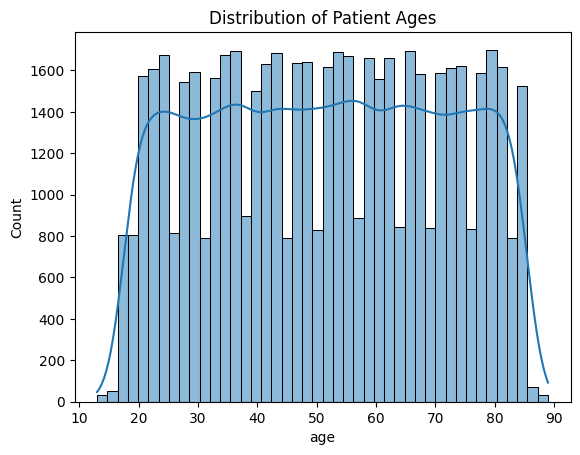

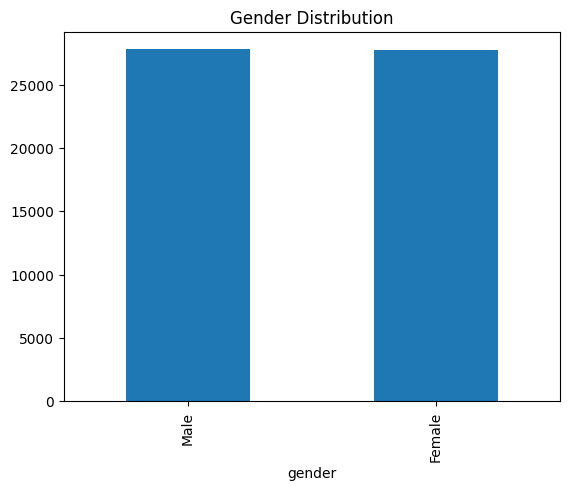

In [ ]:
# Quick Visualisation
sns.histplot(df['age'], kde=True)
plt.title("Distribution of Patient Ages")
plt.show()

df['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.show()